In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [10]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [11]:
#compute mean and median of age and fare
mean_age = df['Age'].mean()
median_age = df['Age'].median()

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

In [12]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [13]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
737,35.0,512.3292,0,35.000000,35.0,512.3292,512.3292
29,NaN,7.8958,0,29.699118,28.0,7.8958,7.8958
255,29.0,15.2458,2,29.000000,29.0,15.2458,15.2458
279,35.0,20.2500,2,35.000000,35.0,20.2500,20.2500
572,36.0,26.3875,0,36.000000,36.0,26.3875,26.3875


In [14]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  162.3385298533084
Age Variance after mean imputation:  161.81386645586778
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.098181126128
Fare Variance after mean imputation:  2324.2440261086986


In [22]:
import seaborn as sns

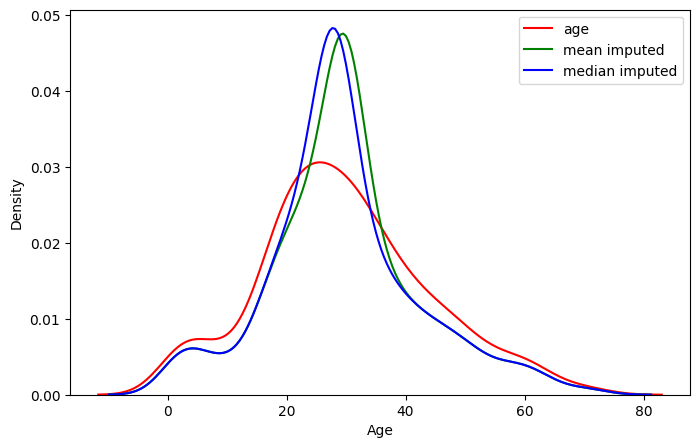

In [36]:
plt.figure(figsize=(8, 5))
plt.subplot(111)
# X_train['Age'].plot(kind='kde')
# X_train['Age_mean'].plot(kind='kde')
# X_train['Age_median'].plot(kind='kde')
sns.kdeplot(X_train['Age'], color='red', label = 'age')
sns.kdeplot(X_train['Age_mean'], color='green', label = 'mean imputed')
sns.kdeplot(X_train['Age_median'], color='blue', label = 'median imputed')
plt.legend()
plt.show()

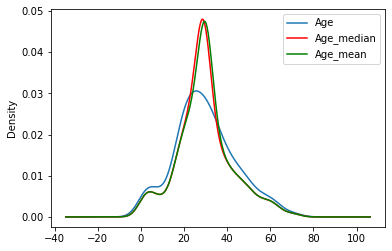

In [180]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

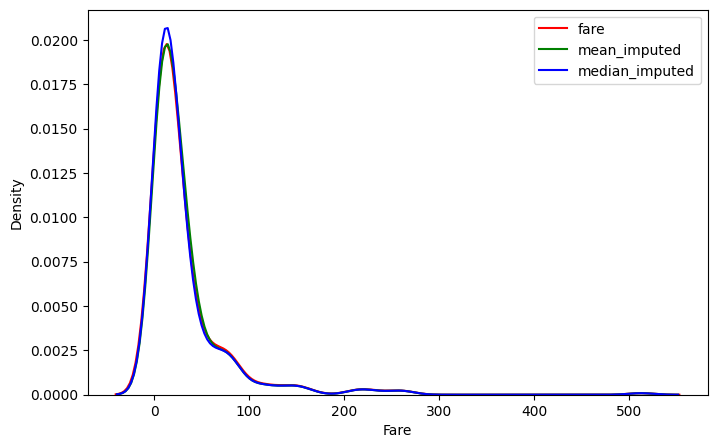

In [34]:
#using seaborn
plt.figure(figsize=(8, 5))
plt.subplot(111)
sns.kdeplot(X_train['Fare'], color='red', label = 'fare')
sns.kdeplot(X_train['Fare_mean'], color='green', label = 'mean_imputed')
sns.kdeplot(X_train['Fare_median'], color='blue', label = 'median_imputed')
plt.legend()
plt.show()

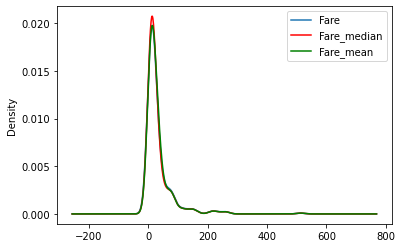

In [181]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [35]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.631558,64.858451
Fare,70.719262,2448.197914,17.258917,55.800924,59.661820,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.143296,-5.088278,16.386748,16.476326
Age_mean,204.349513,55.800924,-5.143296,161.813866,161.838181,52.948856,51.541608
Age_median,204.349513,59.661820,-5.088278,161.838181,162.338530,56.613065,55.142638
Fare_mean,66.631558,2448.197914,16.386748,52.948856,56.613065,2324.244026,2324.533881
Fare_median,64.858451,2448.197914,16.476326,51.541608,55.142638,2324.533881,2340.098181


In [183]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


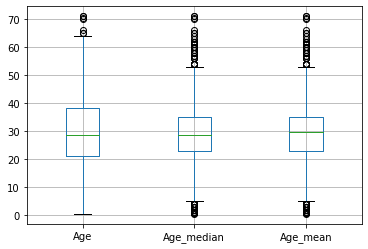

In [184]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

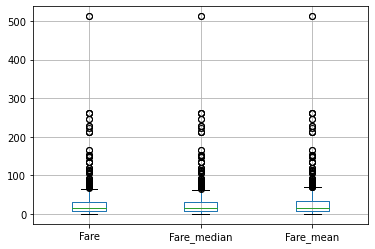

In [185]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

### Using Sklearn

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [39]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [40]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [41]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [42]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [43]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [44]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))